In [1]:
#importando a biblioteca pandas

import pandas as pd

In [2]:
#utilizando a função read_excel para ler o arquivo

df = pd.read_excel('Dataset.xlsx')

In [3]:
#utlizando a função read para exibir as 5 primeiras linhas do data fame

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Identificando se o data frame possui valores ausentes

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

O data frame não possui valores nulos

In [5]:
#visualizando as informações do data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

O data frame possui valores do tipo int64 e object

In [6]:
#criando um dicionário de tipo de dados

target = "Attrition"
feature_dtype = {}


for c in df.columns:
    
    if c == target: continue
    
    data_type = str(df[c].dtype)
    
    if data_type not in feature_dtype.keys():
         feature_dtype[data_type] = [c]
    else:
        feature_dtype[data_type].append(c)

In [7]:
#Visualizando o dicionário

feature_dtype

{'int64': ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 'object': ['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime']}

In [8]:
#salvando o nome das colunas do tipo object em categorial_features

categorical_features = feature_dtype["object"]
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [9]:
#salvando o nome das colunas do tipo int64 em numerical_features

numerical_features = feature_dtype["int64"]
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
#Visualizando a quantidade de valores únicos para cada coluna

df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Todas as colunas, exceto "StandardHours" e "EmployeeCount", que possuem até 9 valores únicos são as colunas do tipo Categórica

In [11]:
#adicionando StandardHours e EmployeeCount na variável remove

remove = ["StandardHours"]
remove.append("EmployeeCount")
remove.append("TrainingTimesLastYear")

In [12]:
#count_features irá receber somente os nomes das colunas de numerical_features que possuem a quantidade de valores únicos menor que 10
#e não esteja em remove

count_features = []

for i in [i for i in numerical_features if len(df[i].unique()) < 10 and i not in remove]:
    count_features.append(i)

In [13]:
df[count_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2,2,3,2,4,3,1,0,1
1,1,3,2,2,2,4,4,1,3
2,2,4,2,1,3,3,2,0,3
3,4,4,3,1,3,3,3,0,3
4,1,1,3,1,2,3,4,1,3


In [14]:
df[categorical_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


# Qui-quadrado 

Qui-quadrado  mede a relação de dependência entre duas variáveis categóricas, verificando como os valores esperados desviam dos valores observados.
Quando temos um alto valor de Qui-quadrado (nosso p-value será baixo), significa que temos evidência estatística para inferir que os valores observados e esperados não são os mesmos, portanto possuem dependência entre si.
Quanto mais alto o Qui-quadrado, maior a dependência entre as variáveis.

In [15]:
#Calculando o Qui-quadrado
#p-value < 0.05 para um Qui-quadrado alto

from scipy.stats import chi2_contingency

p_value_table = pd.DataFrame(index = [target], columns = (categorical_features+count_features))

for c in (categorical_features+count_features):

    crosstable = pd.crosstab(df[c], df[target])
    chi2, p, dof, expected = chi2_contingency(crosstable)
    p_value_table[c][target] = p

p_value_table = p_value_table.T
p_value_table["p < 0.05"] = p_value_table.apply(lambda x : x < 0.05)

In [16]:
#Visualizando a tabela com os resultados

p_value_table.sort_values("Attrition", ascending=False)

,Attrition,p < 0.05
Over18,1.0,False
PerformanceRating,0.990075,False
Education,0.545525,False
Gender,0.290572,False
RelationshipSatisfaction,0.154972,False
EducationField,0.006774,True
Department,0.004526,True
WorkLifeBalance,0.000973,True
JobSatisfaction,0.000556,True
EnvironmentSatisfaction,0.000051,True


In [17]:
#visualizando os atributos sem dependência com Attrition
ns = p_value_table[p_value_table["p < 0.05"] == False].index.tolist()
ns

['Gender',
 'Over18',
 'Education',
 'PerformanceRating',
 'RelationshipSatisfaction']

In [18]:
#visualizando os atributos com dependência com Attrition

significant = p_value_table[p_value_table["p < 0.05"] == True].index.tolist()
significant

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

# Análise dos Atributos (Colunas) Categóricos em relação ao Attrition 

In [19]:
#importando as bibliotecas para visualização de dados

import seaborn as sns
import matplotlib.pyplot as plt

### A maioria dos funcionários com desgaste (Attrition) raramente viaja

<AxesSubplot:ylabel='BusinessTravel'>

<Figure size 432x288 with 0 Axes>

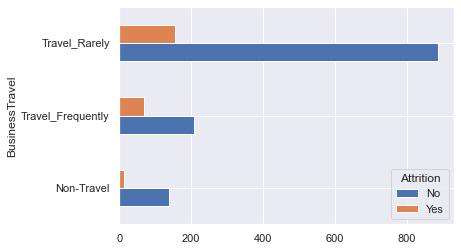

In [20]:
sns.set()
plt.figure(figsize=(6, 4))
df.groupby(by = ['BusinessTravel'])['Attrition'].value_counts().unstack().plot.barh()

In [21]:
group = df.groupby(by = ['BusinessTravel'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['BusinessTravel'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
BusinessTravel,,
Non-Travel,11.192214,5.063291
Travel_Frequently,16.869424,29.113924
Travel_Rarely,71.938362,65.822785


### Os departamentos Research & Development e Sales são responsáveis por cerca de 95% dos funcionários com desgaste 

<AxesSubplot:ylabel='Department'>

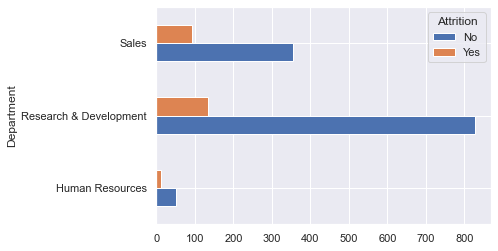

In [22]:
df.groupby(by = ['Department'])['Attrition'].value_counts().unstack().plot.barh()

In [23]:
group = df.groupby(by = ['Department'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['Department'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
Department,,
Human Resources,4.136253,5.063291
Research & Development,67.153285,56.118143
Sales,28.710462,38.818565


### O campo da edução de mais da metade dos funcionários com desgates é Life Sciences e Medical

<AxesSubplot:ylabel='EducationField'>

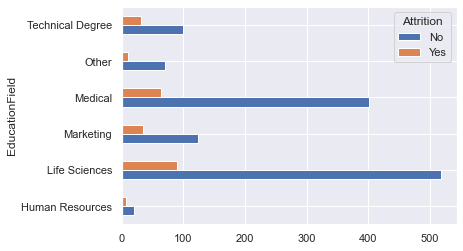

In [24]:
df.groupby(by = ['EducationField'])['Attrition'].value_counts().unstack().plot.barh()

In [25]:
group = df.groupby(by = ['EducationField'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['EducationField'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
EducationField,,
Human Resources,1.622060,2.953586
Life Sciences,41.930251,37.552743
Marketing,10.056772,14.767932
Medical,32.522303,26.582278
Other,5.758313,4.641350
Technical Degree,8.110300,13.502110


### Cerca de 70% dos funcionários com desgaste possuem os seguintes cargos laboratory technicians, sale executives, and research scientists

<AxesSubplot:ylabel='JobRole'>

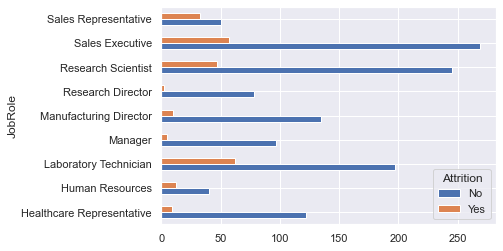

In [26]:
df.groupby(by = ['JobRole'])['Attrition'].value_counts().unstack().plot.barh()

In [27]:
group = df.groupby(by = ['JobRole'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['JobRole'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
JobRole,,
Healthcare Representative,9.894566,3.797468
Human Resources,3.244120,5.063291
Laboratory Technician,15.977291,26.160338
Manager,7.866991,2.109705
Manufacturing Director,10.948905,4.219409
Research Director,6.326034,0.843882
Research Scientist,19.870235,19.831224
Sales Executive,21.816707,24.050633
Sales Representative,4.055150,13.924051


### 50 % dos funcionários com desgaste são solteiros

<AxesSubplot:ylabel='MaritalStatus'>

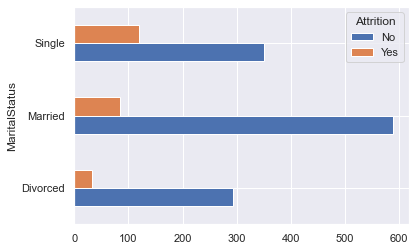

In [28]:
df.groupby(by = ['MaritalStatus'])['Attrition'].value_counts().unstack().plot.barh()

In [29]:
group = df.groupby(by = ['MaritalStatus'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['MaritalStatus'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
MaritalStatus,,
Divorced,23.844282,13.924051
Married,47.769667,35.443038
Single,28.386050,50.632911


### A maioria dos funcionários com desgaste não fazem horas extras 

<AxesSubplot:ylabel='OverTime'>

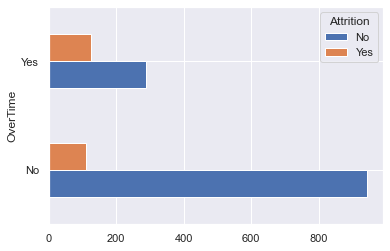

In [30]:
df.groupby(by = ['OverTime'])['Attrition'].value_counts().unstack().plot.barh()

In [31]:
group = df.groupby(by = ['OverTime'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['OverTime'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
OverTime,,
No,76.561233,46.413502
Yes,23.438767,53.586498


### Cerca de 63% das avaliações de satisfação com o ambiente, de funcionários sem desgaste, é como Alta e Muito Alta

<AxesSubplot:ylabel='EnvironmentSatisfaction'>

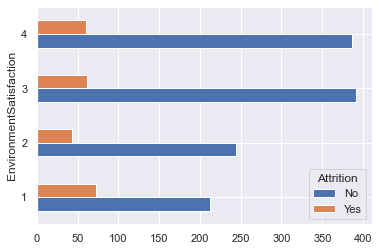

In [32]:
df.groupby(by = ['EnvironmentSatisfaction'])['Attrition'].value_counts().unstack().plot.barh()

In [33]:
group = df.groupby(by = ['EnvironmentSatisfaction'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['EnvironmentSatisfaction'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
EnvironmentSatisfaction,,
1,17.193836,30.379747
2,19.789132,18.143460
3,31.711273,26.160338
4,31.305758,25.316456


### Cerca de 80% dos funcionários com desgaste possuem envolvimento com o trabalho moderado e alto

<AxesSubplot:ylabel='JobInvolvement'>

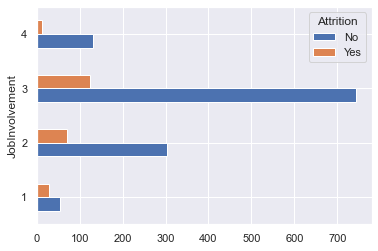

In [34]:
df.groupby(by = ['JobInvolvement'])['Attrition'].value_counts().unstack().plot.barh()

In [35]:
group = df.groupby(by = ['JobInvolvement'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['JobInvolvement'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
JobInvolvement,,
1,4.460665,11.814346
2,24.655312,29.957806
3,60.259530,52.742616
4,10.624493,5.485232


### 60% dos funcionários com desgaste possuem nível 1

<AxesSubplot:ylabel='JobLevel'>

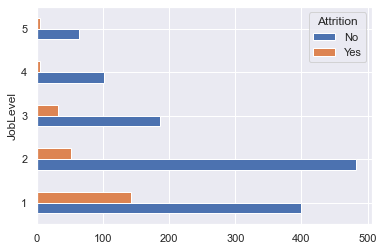

In [36]:
df.groupby(by = ['JobLevel'])['Attrition'].value_counts().unstack().plot.barh()

In [37]:
group = df.groupby(by = ['JobLevel'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['JobLevel'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
JobLevel,,
1,32.441200,60.337553
2,39.091646,21.940928
3,15.085158,13.502110
4,8.191403,2.109705
5,5.190592,2.109705


### Cerca de 60% dos funcionários sem desgaste avaliam a satisfação com o trabalho como alta e muito alta

<AxesSubplot:ylabel='JobSatisfaction'>

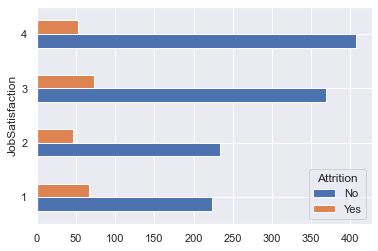

In [38]:
df.groupby(by = ['JobSatisfaction'])['Attrition'].value_counts().unstack().plot.barh()

In [39]:
group = df.groupby(by = ['JobSatisfaction'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['JobSatisfaction'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
JobSatisfaction,,
1,18.085969,27.848101
2,18.978102,19.409283
3,29.927007,30.801688
4,33.008921,21.940928


### 65% dos funcionários com desgaste possuem nível de opções de ações igual a 0

<AxesSubplot:ylabel='StockOptionLevel'>

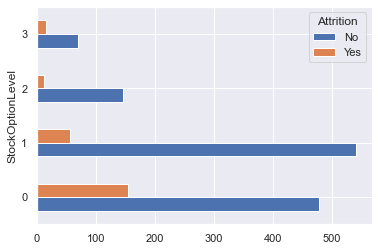

In [40]:
df.groupby(by = ['StockOptionLevel'])['Attrition'].value_counts().unstack().plot.barh()

In [41]:
group = df.groupby(by = ['StockOptionLevel'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['StockOptionLevel'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
StockOptionLevel,,
0,38.686131,64.978903
1,43.795620,23.628692
2,11.841038,5.063291
3,5.677210,6.329114


### Cerca de 77% dos funcionários com desgaste classificam o equilíbrio entre a vida pessoal e profissional como boa e melhor

<AxesSubplot:ylabel='WorkLifeBalance'>

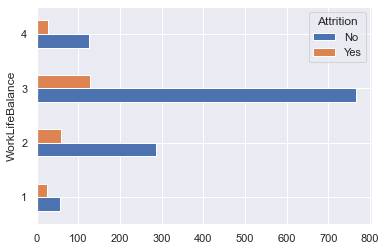

In [42]:
df.groupby(by = ['WorkLifeBalance'])['Attrition'].value_counts().unstack().plot.barh()

In [43]:
group = df.groupby(by = ['WorkLifeBalance'])['Attrition'].value_counts().unstack()
(group/df.groupby(by = ['WorkLifeBalance'])['Attrition'].value_counts().unstack().sum())*100

Attrition,No,Yes
WorkLifeBalance,,
1,4.460665,10.548523
2,23.195458,24.472574
3,62.124899,53.586498
4,10.218978,11.392405


# Análise dos Atributos (Colunas) numéricas em relação ao Attrition 

In [44]:
#selecionando somente os atributos numéricos

numerical = []
numerical.append(target)

for i in [i for i in numerical_features if i not in count_features]:
    numerical.append(i)

In [45]:
numerical

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [46]:
#Selecionando somente os valores onde Attrition == Yes

df_Yes = df.query('Attrition == "Yes"')
df_Yes.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsInCurrentRole'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSu

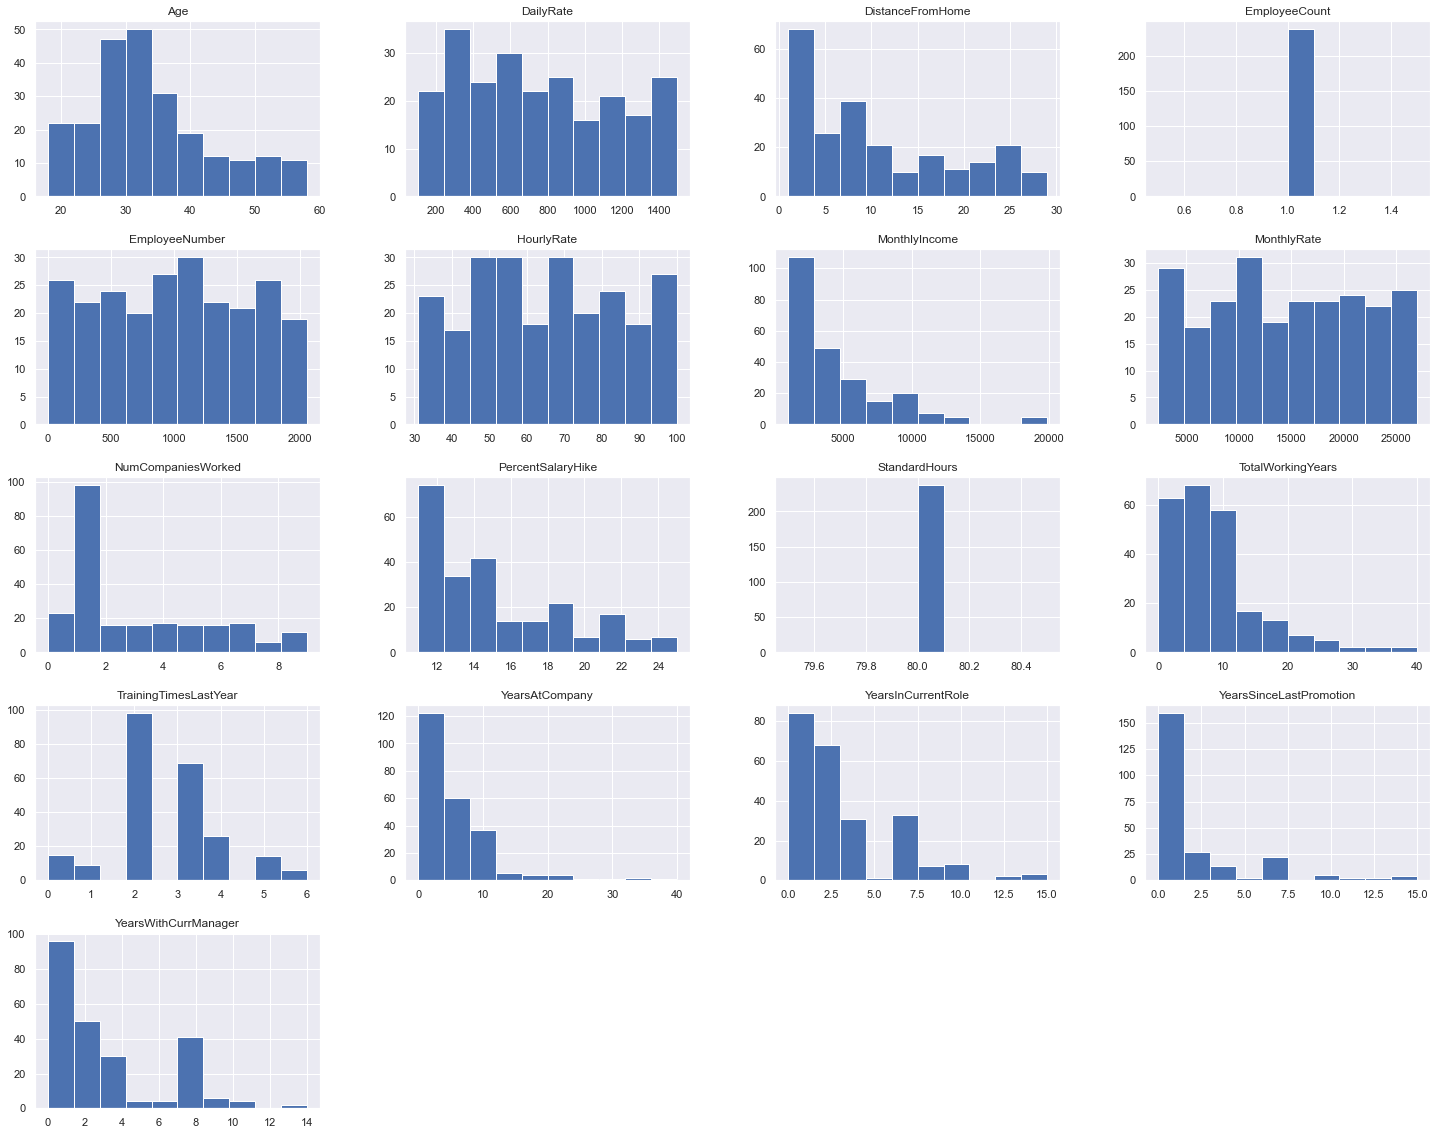

In [47]:
#visualizando os histogramas 

df_Yes[numerical].hist(figsize = (25, 20))

#### A partir destas visualizações podemos perceber coisas como:  maioria dos funcionários com desgaste então entre 25 e 40 anos, a distância de casa está entre 0 e 5, o percentual de aumento do salário é 12, a quantidade de anos desde a ultima promoção está entre 0 e 2,5, renda mensal inferior a 5000

# Prevendo o Desgaste

Para prever o desgaste, primeiramente irei transformar os atributos do tipo object em inteiro por meio da função get_dummies do pandas. Esta função recebe uma lista, ou uma string que pode será convertida em lista a partir de um separador, e cria uma coluna para cada dummie (atributo categorico) com um dado númerico que representa aquele dummie em uma data linha.

In [48]:
#utilizando a função get_dummies

transformed_df = pd.get_dummies(df, columns= ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 'Over18','OverTime'],dtype=int)
transformed_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,1,2061,3,41,4,...,0,0,0,0,0,1,0,1,1,0
1466,39,No,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,1,0,1,1,0
1467,27,No,155,4,3,1,2064,2,87,4,...,0,0,0,0,0,1,0,1,0,1
1468,49,No,1023,2,3,1,2065,4,63,2,...,0,0,1,0,0,1,0,1,1,0


In [49]:
#visualizando a proporção dos valores do atributo Attrition, que é o que queremos prever

transformed_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)

Gera dados sintéticos da classe minoritária

In [50]:
#separando os atributos e o target (Attrition)

X = transformed_df.drop("Attrition", axis = 1)
y = transformed_df['Attrition']

In [51]:
#importanto SMOTE

from imblearn.over_sampling import SMOTE

In [52]:
#Aplicando o SMOTE nos dados

smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [53]:
#Visualizando a proporção

y.value_counts()

Yes    1233
No     1233
Name: Attrition, dtype: int64

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split

In [55]:
#dividindo os dados em treino e teste

SEED = 23
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
print('O dataset de treino possui {} dados e o de treino {} dados.' .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 1849 dados e o de treino 617 dados.


## Random Forest

Dizendo de modo simples: o algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

O algoritmo Random Forest foi setado com parâmetros padrões da biblioteca, exceto pelo n_estimetors que ficou igual a 900. No treinamento foi feita a validação cruzada  k-fold com k = 10.

Relatório de classificação: modelo Random Forest
               precision    recall  f1-score   support

          No     0.9029    0.9751    0.9376       925
         Yes     0.9729    0.8950    0.9324       924

    accuracy                         0.9351      1849
   macro avg     0.9379    0.9351    0.9350      1849
weighted avg     0.9379    0.9351    0.9350      1849



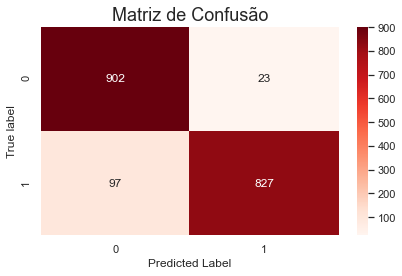

In [56]:
#utilizando o algoritmo Random Forest para classificar

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 10, shuffle = True)
model = RandomForestClassifier(n_estimators = 900)
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred ), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

print('Relatório de classificação: modelo Random Forest\n', classification_report(y_train, y_pred, digits=4))

### Conclusão

Neste trabalho foram feitas algumas análises dos dados para entender o que pode afetar o desgaste de funcionários. Bem como a implementação de um algoritmos de machine learn, o Random Forest que obteve um recall de 97,5% para funcionários sem desgaste e 89,5% para funcionários com desgaste.